In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## The SD and Bell Shaped Curves

In [25]:
births = Table.read_table('baby.csv')

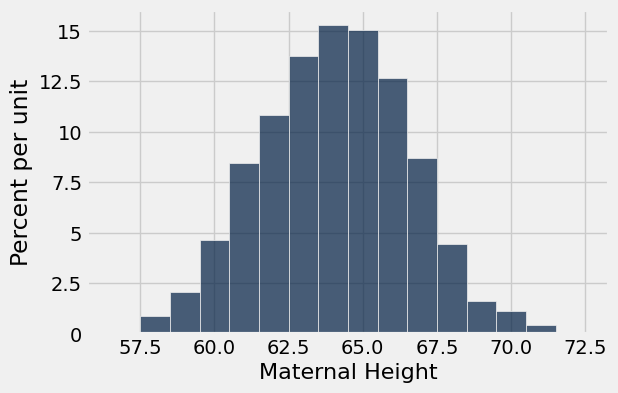

In [26]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [27]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [5]:
np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)

(61.524378306903088, 66.574429188837968)

## Activity: Central Limit Theorem ##

In [6]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


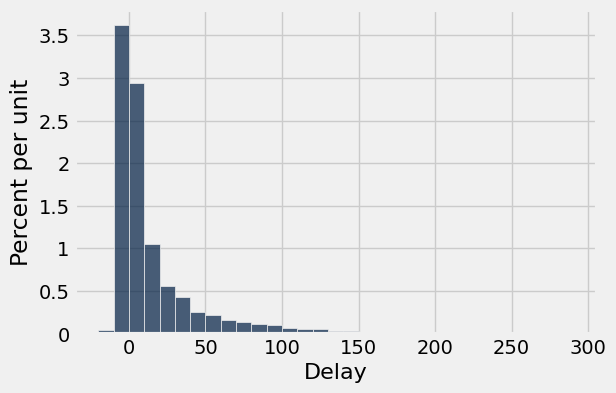

In [7]:
united.hist('Delay', bins=united_bins)

*Activity 1:* Compute the mean and standard deviation in the population of United flights.

In [9]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

*Activity 2:* Fill in the function below to take a random sample (of size `sample_size`) from the population of United flights and compute the mean delay time. 

In [40]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes the mean delay 
    """
    sampled_flights = united.sample(sample_size).column('Delay')
    return np.mean(sampled_flights)

*Activity 3:* Compute the mean of a sample of size 100. 

In [41]:
one_sample_mean(100)

14.66

*Activity 4:* Fill in the function below to compute 10000 sample means of a given sample size. 

In [42]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [43]:
sample_means_100 = ten_thousand_sample_means(100)
sample_means_100

array([ 12.21,  15.81,  16.7 , ...,  13.77,  14.01,  19.11])

**Discussion Question:** True or False. The distribution of sample means in `sample_means_100` should look approximatly the same as the distribution of delay times. Fill in the cell below to check your answer.

Population Average: 16.6581555154


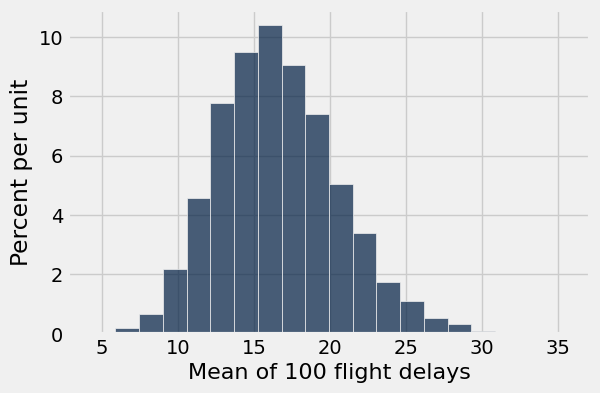

In [44]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

*Activity 5:* What is the center (mean) of this distribution of means. How about the standard deviation?

In [45]:
np.mean(sample_means_100),np.std(sample_means_100)

(16.611260000000005, 3.9398446330280588)

*Activity 6:* Compute 10000 sample means of sample size 400. What is the center (mean) of this distribution of means. How about the standard deviation?

Population Average: 16.6581555154


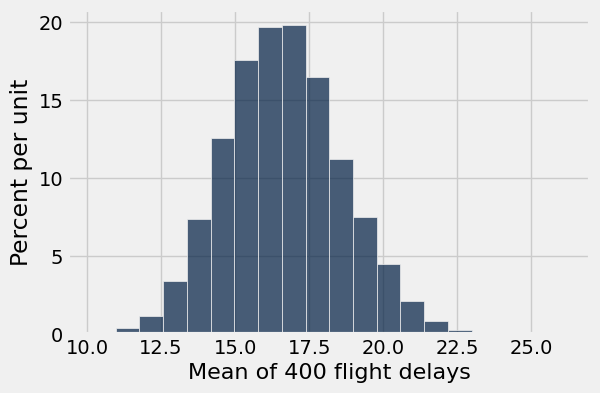

In [46]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)

In [47]:
np.mean(sample_means_400),np.std(sample_means_400)

(16.648204999999997, 1.9534105880421044)

**Discussion Question**: How does this distribution compare to the one from samples of size 100?

*Activity 7:* Compute 10000 sample means of sample size 900. What is the center (mean) of this distribution of means. How about the standard deviation?

Population Average: 16.6581555154


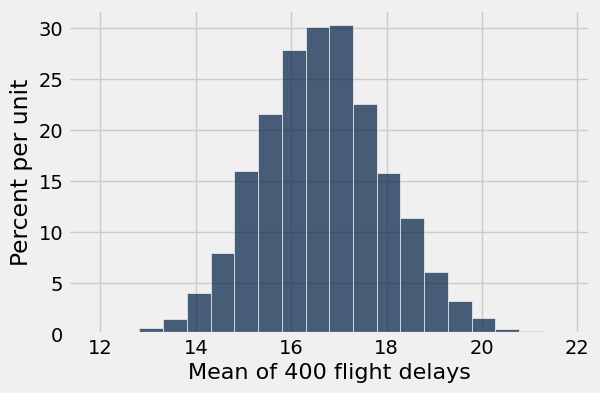

In [22]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column(
    'Mean of 400 flight delays', sample_means_900).hist(bins=20)

print('Population Average:', delay_mean)

In [24]:
np.mean(sample_means_900),np.std(sample_means_900)

(16.67224255555556, 1.3037150589828495)

**Discussion Question:** Are you noticing any patterns? Do the same thing with samples of size 1600 if you are stuck.